<h1 style="text-align: center;">🌟 Customer Churn Prediction </h1>

# <a id='1'>1. Business Understanding</a>
In the telecommunications industry, retaining customers is a key challenge due to the highly competitive market. 
Customer churn, defined as customers discontinuing their subscriptions, leads to significant revenue loss and 
increased costs for acquiring new customers. Studies suggest that acquiring a new customer can cost five times more 
than retaining an existing one.

### 🎯 **Business Objectives**

<div style="font-size:18px;">

<table style="width:100%; border-collapse: collapse; font-size:18px;">
    <tr style="background-color:#E8F4FF; color:#3366CC; font-weight:bold;">
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Business Objective</th>
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Description</th>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🔵 <b>BO1</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">Enhance customer satisfaction by identifying the key factors driving customer churn.</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🟢 <b>BO2</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">Identify customers with a high likelihood of churn to enable effective retention strategies and minimize churn.</td>
    </tr>
</table>

</div>

---

### 🎯 **Data Science Objectives**

<div style="font-size:18px;">

<table style="width:100%; border-collapse: collapse; font-size:18px;">
    <tr style="background-color:#E8FFF4; color:#33AA33; font-weight:bold;">
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Data Science Objective</th>
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Description</th>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🚀 <b>DSO1</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">Build and evaluate advanced machine learning models to determine the best-performing model, analyze key churn-driving features, and design data-driven retention strategies.</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🚀 <b>DSO2</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">Build and optimize machine learning algorithms to forecast churn and cluster customers to interpret their behavior patterns effectively.</td>
    </tr>
</table>

</div>

### CRISP-DM Methodology:
This project follows the CRISP-DM framework:
1. **Business Understanding**: Define goals and the importance of churn prediction.
2. **Data Understanding**: Analyze the data to identify patterns and distributions.
3. **Data Preparation**: Clean and preprocess the data for machine learning.
4. **Modeling**: Train and evaluate predictive models.
5. **Evaluation**: Assess model performance using metrics like Accuracy, AUC, Precision, etc.
6. **Deployment**: Save the best model for deployment and provide recommendations.

### Why Machine Learning?
Traditional methods for churn prediction rely on simple statistical models that cannot capture complex relationships 
in customer data. Machine learning offers:
- Scalability for large datasets.
- High accuracy through advanced algorithms.
- Insights into customer behavior via feature importance and explainability.

By leveraging machine learning, this project aims to improve retention efforts and enhance business profitability.

# <a id='1'>📊 Data Explanation</a>

### Overview of the Dataset:
The datasets used in this project (`churn-bigml-20.csv` and `churn-bigml-80.csv`) contain customer information 
collected by a telecom company. They provide insights into customer behavior, service usage, and account details.

### Key Features:
1. **State**: Customer's state (categorical).
2. **Account length**: Duration of account in days (numeric).
3. **Area code**: Customer's area code (numeric).
4. **International plan**: Whether the customer has an international calling plan (Yes/No).
5. **Voice mail plan**: Whether the customer has a voice mail plan (Yes/No).
6. **Number vmail messages**: Number of voice mail messages (numeric).
7. **Total day minutes/calls/charge**: Daytime call usage and charges (numeric).
8. **Total eve minutes/calls/charge**: Evening call usage and charges (numeric).
9. **Total night minutes/calls/charge**: Nighttime call usage and charges (numeric).
10. **Total intl minutes/calls/charge**: International call usage and charges (numeric).
11. **Customer service calls**: Number of calls to customer service (numeric).
12. **Churn**: Target variable indicating whether the customer churned (binary - Yes/No).

### Target Variable:
The target variable is `Churn`, which indicates whether a customer left the telecom service (`Yes`) or stayed (`No`). 
The dataset is imbalanced, with the majority of customers being non-churners. Addressing this imbalance will be critical 
to building robust models.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from numpy import isnan
from pandas import read_csv
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import math
from sklearn.cluster import KMeans
import xgboost as xgb
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from IPython.display import SVG, display
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import plotly.offline as py # visualization
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.tree import export_graphviz
from graphviz import Source  # Importing Source for visualization
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import graphviz
import joblib

# First cell: Setup
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Now warnings are suppressed for the entire notebook session.



# <a id='2'>2. Data Understanding</a>

In [3]:
# Load datasets
data_20 = pd.read_csv("churn-bigml-20.csv")
data_80 = pd.read_csv("churn-bigml-80.csv")

In [4]:
# Combine the datasets
data_combined = pd.concat([data_20, data_80], ignore_index=True)

In [5]:
data_combined.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

In [6]:
data_combined.tail()

State  Account length  Area code International plan Voice mail plan  \
3328    SC              79        415                 No              No   
3329    AZ             192        415                 No             Yes   
3330    WV              68        415                 No              No   
3331    RI              28        510                 No              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3328                      0              134.7               98   
3329                     36              156.2               77   
3330                      0              231.1               57   
3331                      0              180.8              109   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3328             22.90              189.7               68             16.12   
3329             26.55              215.5              126             18.32   
3330             39.29              153.4               55             13.04   
3331             30.74              288.8               58             24.55   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
3328                221.4                128                9.96   
3329                279.1                 83               12.56   
3330                191.3                123                8.61   
3331                191.9                 91                8.64   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3328                11.8                 5               3.19   
3329                 9.9                 6               2.67   
3330                 9.6                 4               2.59   
3331                14.1                 6               3.81   
3332                13.7                 4               3.70   

      Customer service calls  Churn  
3328                       2  False  
3329                       2  False  
3330                       3  False  
3331                       2  False  
3332                       0  False

### 🎯Displaying the Dataset

In [7]:
# Display basic info
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### 🎯Descriptive Statistics

In [8]:
data_combined.describe().transpose()

count        mean        std     min     25%     50%  \
Account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
Area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
Number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
Total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
Total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
Total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
Total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
Total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
Total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
Total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
Total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
Total night charge      3333.0    9.039325   2.275873    1.04    7.52    9.05   
Total intl minutes      3333.0   10.237294   2.791840    0.00    8.50   10.30   
Total intl calls        3333.0    4.479448   2.461214    0.00    3.00    4.00   
Total intl charge       3333.0    2.764581   0.753773    0.00    2.30    2.78   
Customer service calls  3333.0    1.562856   1.315491    0.00    1.00    1.00   

                           75%     max  
Account length          127.00  243.00  
Area code               510.00  510.00  
Number vmail messages    20.00   51.00  
Total day minutes       216.40  350.80  
Total day calls         114.00  165.00  
Total day charge         36.79   59.64  
Total eve minutes       235.30  363.70  
Total eve calls         114.00  170.00  
Total eve charge         20.00   30.91  
Total night minutes     235.30  395.00  
Total night calls       113.00  175.00  
Total night charge       10.59   17.77  
Total intl minutes       12.10   20.00  
Total intl calls          6.00   20.00  
Total intl charge         3.27    5.40  
Customer service calls    2.00    9.00

### 🎯Missing values


In [9]:
print(data_combined.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


### 🎯Unique values



In [10]:
data_combined.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

### 🎯Identify numeric and categorical columns


In [11]:
# Get all columns from the dataset
all_columns = data_combined.columns.tolist()  # Extract all column names from the dataset

# Predefined categorical variables and target
categorical_vars = ['State', 'International plan', 'Voice mail plan', 'Area code']
target = ['churn']
# Dynamically identify numerical variables as the rest
numerical_vars = [col for col in data_combined.columns if col.strip().lower() not in [c.lower() for c in categorical_vars + target]]
# Define light blue color for text
light_blue = '\033[94m'
reset_color = '\033[0m'

# Print the results for confirmation with counts and colored titles
print(f"{light_blue}Categorical Variables ({len(categorical_vars)}):{reset_color}", categorical_vars)
print(f"{light_blue}Target Variable ({len(target)}):{reset_color}", target)
print(f"{light_blue}Numerical Variables ({len(numerical_vars)}):{reset_color}", numerical_vars)

Categorical Variables (4): ['State', 'International plan', 'Voice mail plan', 'Area code']
Target Variable (1): ['churn']
Numerical Variables (15): ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


## 📊Data Visualization

In [12]:
import plotly.graph_objects as go

# Lists of variables
categorical_vars = ['State', 'International plan', 'Voice mail plan', 'Area code']
numerical_vars = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
target = ['churn']

# Data for plotting
variable_types = ['Categorical', 'Numerical', 'Target']
counts = [len(categorical_vars), len(numerical_vars), len(target)]

# Create bar chart
fig = go.Figure(data=[go.Bar(
    x=variable_types,
    y=counts,
    text=counts,
    textposition='auto',
    marker_color=['#1f77b4', '#ff7f0e', '#2ca02c']  # Colors for each bar
)])

# Customize layout
fig.update_layout(
    title='Distribution of Variable Types in Dataset',
    xaxis_title='Variable Type',
    yaxis_title='Count',
    template='plotly_white'
)

# Show plot
fig.show()


### 🎯Churn Distribution


In [13]:
trace = go.Pie(labels = data_combined["Churn"].value_counts().keys().tolist(),
               values = data_combined["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['rgb(174, 68, 90)', 'rgb(232, 188, 185)'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

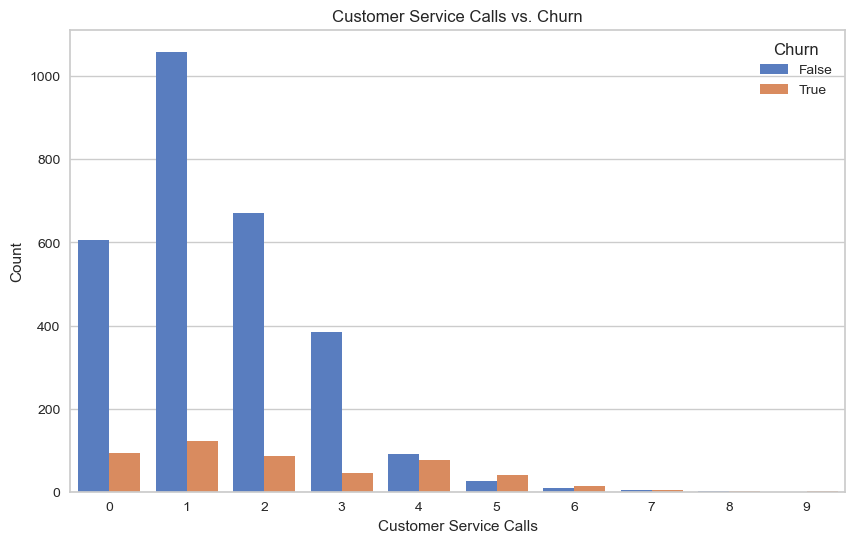

In [14]:
# Customer service calls vs. churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer service calls', hue='Churn', data=data_combined, palette='muted')
plt.title("Customer Service Calls vs. Churn")
plt.xlabel("Customer Service Calls")
plt.ylabel("Count")
plt.legend(title="Churn", loc='upper right')
plt.show()


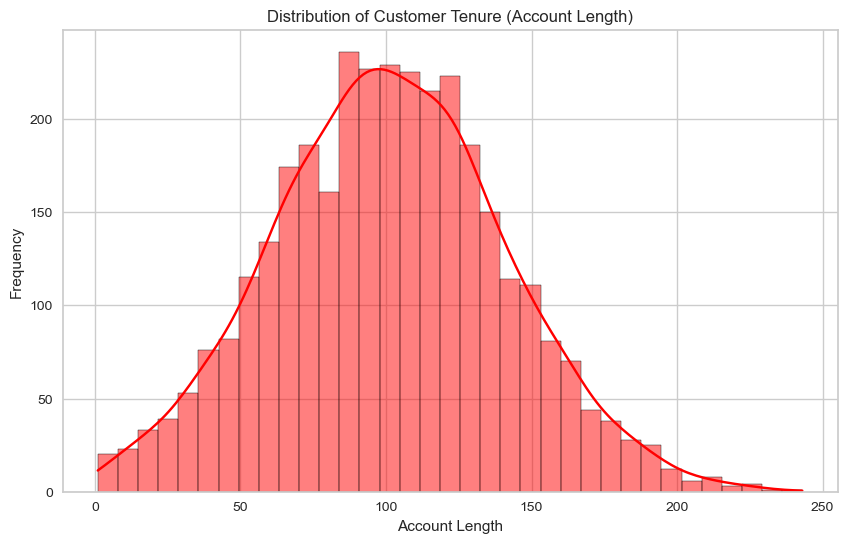

In [15]:
# Plot distribution of customer tenure
plt.figure(figsize=(10, 6))
sns.histplot(data_combined['Account length'], kde=True, color='red')
plt.title("Distribution of Customer Tenure (Account Length)")
plt.xlabel("Account Length")
plt.ylabel("Frequency")
plt.show()

C:\Users\cheri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



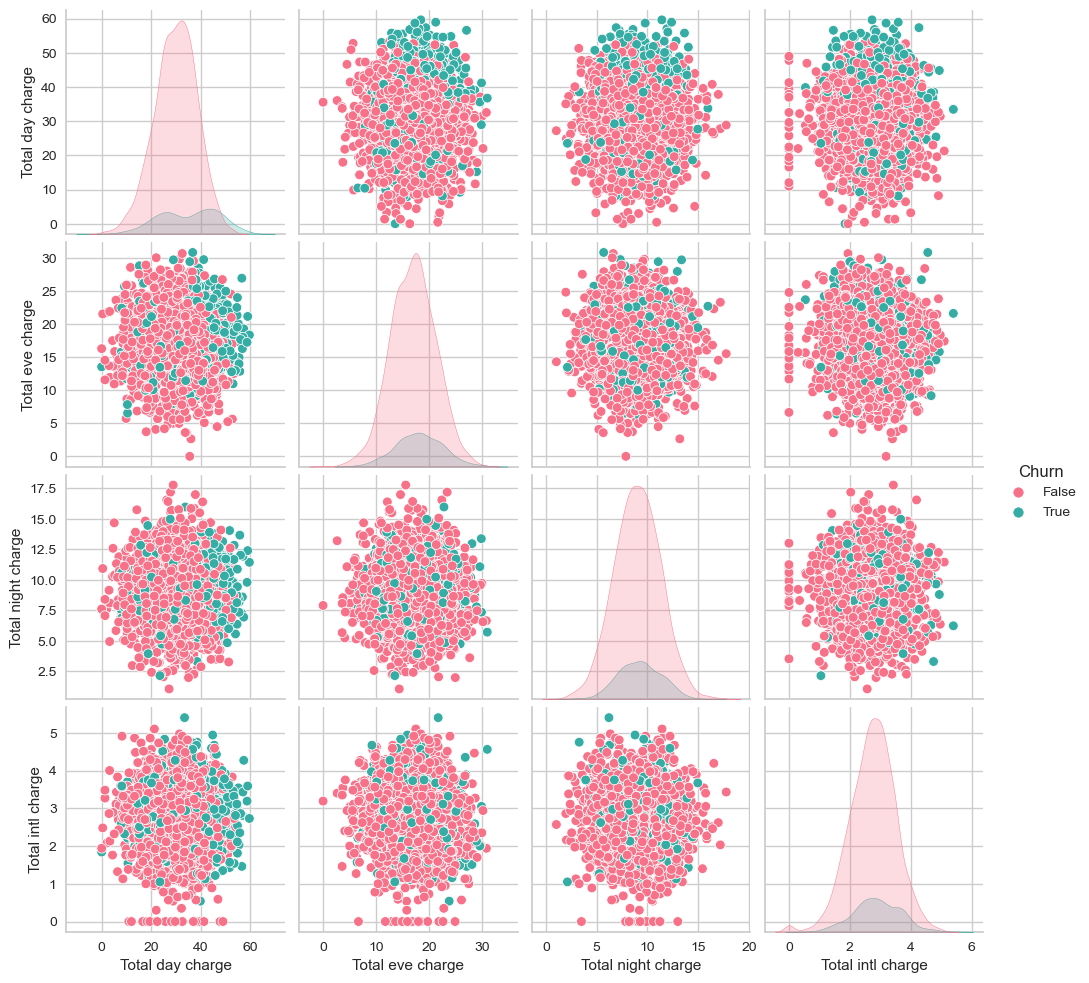

In [16]:
# Pairplot for important features
important_features = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Churn']
sns.pairplot(data_combined[important_features], hue='Churn', palette='husl', diag_kind='kde')
plt.show()


### 🎯Outliers Detection


In [17]:
#outliers
# Set up the number of columns for the grid layout
num_cols = 4  # Number of columns per row
num_rows = math.ceil(len(numerical_vars) / num_cols)  # Calculate number of rows

# Create a grid layout with subplots
figures = []

# Loop through each numerical column and create an interactive boxplot
for col in numerical_vars:
    fig = px.box(data_combined, y=col, title=f'Boxplot of {col}', color_discrete_sequence=["blue"])
    figures.append(fig)

# Display all boxplots interactively
for fig in figures:
    fig.show()

# <a id='3'>3. Data Preparation</a>

## [3.1 Data Cleaning](#3)


### 🎯Handling Outliers

In [18]:
def remove_outliers_iqr(df, columns):
    """
    Removes outliers based on the IQR method for the specified columns.
    Args:
        df (pd.DataFrame): The DataFrame to process.
        columns (list): List of column names to check for outliers.
    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Filter rows within bounds
    return df


In [19]:
# Remove outliers for numerical variables
data_combined_no_outliers = remove_outliers_iqr(data_combined, numerical_vars)

# Verify the changes
print(f"Original dataset size: {data_combined.shape}")
print(f"Dataset size after removing outliers: {data_combined_no_outliers.shape}")


Original dataset size: (3333, 20)
Dataset size after removing outliers: (2797, 20)


In [20]:
# Visualize the cleaned data with boxplots
figures_no_outliers = []
for col in numerical_vars:
    fig = px.box(data_combined_no_outliers, y=col, title=f'Boxplot of {col} (No Outliers)', color_discrete_sequence=["green"])
    figures_no_outliers.append(fig)

# Display the boxplots
for fig in figures_no_outliers:
    fig.show()


### 🎯Duplicate Values


In [21]:
# Check for duplicates
duplicate_count = data_combined_no_outliers.duplicated().sum()
print(f'Number of duplicate records: {duplicate_count}')


Number of duplicate records: 0


## [3.2 Feature engineering](#3)


# 💰 Creating a New Feature: **Total Monthly Charges**

We created a new feature called **Total Monthly Charges** to provide a comprehensive view of the customer's monthly spending. This feature is calculated as the sum of all charges for day, evening, night, and international calls:

Total Monthly Charges
=
Total Day Charge
+
Total Eve Charge
+
Total Night Charge
+
Total Intl Charge

### 🛠 **Purpose**:
- This feature consolidates the total spending into a single metric.
- It simplifies analysis by providing an overall view of customer expenses.

---

### ✅ **Outcome**:
The new feature **Total Monthly Charges** has been successfully added to the dataset, allowing us to better understand customer spending behavior. 🎉


In [22]:
# Calculate total charges per month (sum of all charges in one month)
data_combined_no_outliers['Total Monthly Charges'] = (data_combined_no_outliers['Total day charge'] + 
                                             data_combined_no_outliers['Total eve charge'] + 
                                             data_combined_no_outliers['Total night charge'])
data_combined_no_outliers

State  Account length  Area code International plan Voice mail plan  \
3       SC             111        415                 No              No   
4       HI              49        510                 No              No   
5       AK              36        408                 No             Yes   
6       MI              65        415                 No              No   
8       VA              10        408                 No              No   
...    ...             ...        ...                ...             ...   
3328    SC              79        415                 No              No   
3329    AZ             192        415                 No             Yes   
3330    WV              68        415                 No              No   
3331    RI              28        510                 No              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3                         0              110.4              103   
4                         0              119.3              117   
5                        30              146.3              128   
6                         0              211.3              120   
8                         0              186.1              112   
...                     ...                ...              ...   
3328                      0              134.7               98   
3329                     36              156.2               77   
3330                      0              231.1               57   
3331                      0              180.8              109   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  ...  Total eve charge  \
3                18.77              137.3  ...             11.67   
4                20.28              215.1  ...             18.28   
5                24.87              162.5  ...             13.81   
6                35.92              162.6  ...             13.82   
8                31.64              190.2  ...             16.17   
...                ...                ...  ...               ...   
3328             22.90              189.7  ...             16.12   
3329             26.55              215.5  ...             18.32   
3330             39.29              153.4  ...             13.04   
3331             30.74              288.8  ...             24.55   
3332             39.85              265.9  ...             22.60   

      Total night minutes  Total night calls  Total night charge  \
3                   189.6                105                8.53   
4                   178.7                 90                8.04   
5                   129.3                109                5.82   
6                   134.7                118                6.06   
8                   282.8                 57               12.73   
...                   ...                ...                 ...   
3328                221.4                128                9.96   
3329                279.1                 83               12.56   
3330                191.3                123                8.61   
3331                191.9                 91                8.64   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3                    7.7                 6               2.08   
4                   11.1                 1               3.00   
5                   14.5                 6               3.92   
6                   13.2                 5               3.56   
8                   11.4                 6               3.08   
...                  ...               ...                ...   
3328                11.8                 5               3.19   
3329                 9.9                 6               2.67   
3330                 9.6                 4               2.59   
333

## [3.3 Data Transformation](#3)


In [23]:
data= data_combined_no_outliers.copy()  # Create a copy of the DataFrame for scaling

# Step 1: Drop the specified columns
columns_to_drop = ['Total day charge', 'Total night charge', 'Total eve charge', 
                   
                   'Total intl charge' ,'Number vmail messages','Area code', 'State']

# Drop the selected columns
data = data.drop(columns=columns_to_drop)

In [24]:
data

Account length International plan Voice mail plan  Total day minutes  \
3                111                 No              No              110.4   
4                 49                 No              No              119.3   
5                 36                 No             Yes              146.3   
6                 65                 No              No              211.3   
8                 10                 No              No              186.1   
...              ...                ...             ...                ...   
3328              79                 No              No              134.7   
3329             192                 No             Yes              156.2   
3330              68                 No              No              231.1   
3331              28                 No              No              180.8   
3332              74                 No             Yes              234.4   

      Total day calls  Total eve minutes  Total eve calls  \
3                 103              137.3              102   
4                 117              215.1              109   
5                 128              162.5               80   
6                 120              162.6              122   
8                 112              190.2               66   
...               ...                ...              ...   
3328               98              189.7               68   
3329               77              215.5              126   
3330               57              153.4               55   
3331              109              288.8               58   
3332              113              265.9               82   

      Total night minutes  Total night calls  Total intl minutes  \
3                   189.6                105                 7.7   
4                   178.7                 90                11.1   
5                   129.3                109                14.5   
6                   134.7                118                13.2   
8                   282.8                 57                11.4   
...                   ...                ...                 ...   
3328                221.4                128                11.8   
3329                279.1                 83                 9.9   
3330                191.3                123                 9.6   
3331                191.9                 91                14.1   
3332                241.4                 77                13.7   

      Total intl calls  Customer service calls  Churn  Total Monthly Charges  
3                    6                       2  False                  38.97  
4                    1                       1  False                  46.60  
5                    6                       0  False                  44.50  
6                    5                       3  False                  55.80  
8                    6                       2  False                  60.54  
...                ...                     ...    ...                    ...  
3328                 5                       2  False                  48.98  
3329                 6                       2  False                  57.43  
3330                 4                       3  False                  60.94  
3331                 6                       2  False                  63.93  
3332                 4                       0  False                  73.31  

[2797 rows x 14 columns]

In [25]:
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].map({True: 1, False: 0})


In [26]:
data.columns = data.columns.str.replace('\xa0', ' ', regex=True).str.strip()


In [28]:
data.head()

Account length  International plan  Voice mail plan  Total day minutes  \
3             111                   0                0              110.4   
4              49                   0                0              119.3   
5              36                   0                1              146.3   
6              65                   0                0              211.3   
8              10                   0                0              186.1   

   Total day calls  Total eve minutes  Total eve calls  Total night minutes  \
3              103              137.3              102                189.6   
4              117              215.1              109                178.7   
5              128              162.5               80                129.3   
6              120              162.6              122                134.7   
8              112              190.2               66                282.8   

   Total night calls  Total intl minutes  Total intl calls  \
3                105                 7.7                 6   
4                 90                11.1                 1   
5                109                14.5                 6   
6                118                13.2                 5   
8                 57                11.4                 6   

   Customer service calls  Churn  Total Monthly Charges  
3                       2      0                  38.97  
4                       1      0                  46.60  
5                       0      0                  44.50  
6                       3      0                  55.80  
8                       2      0                  60.54

In [29]:
print(data.columns)

Index(['Account length', 'International plan', 'Voice mail plan',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls',
       'Churn', 'Total Monthly Charges'],
      dtype='object')


### Scaling 

In [31]:
numeric_columns = [
    'Account length', 'Total day minutes', 'Total day calls', 
    'Total eve minutes', 'Total eve calls', 'Total night minutes',
    'Total night calls', 'Total intl minutes', 'Total intl calls',
    'Customer service calls', 'Total Monthly Charges'
]
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [32]:
data_scaled = data .copy()  # Create a copy of the DataFrame for scaling
data_scaled.head()


Account length  International plan  Voice mail plan  Total day minutes  \
3        0.269767                   0                0          -1.323615   
4       -1.306958                   0                0          -1.154349   
5       -1.637562                   0                1          -0.640847   
6       -0.900061                   0                0           0.595362   
8       -2.298769                   0                0           0.116093   

   Total day calls  Total eve minutes  Total eve calls  Total night minutes  \
3         0.125664          -1.304972         0.102986            -0.237110   
4         0.851763           0.281681         0.467148            -0.460386   
5         1.422269          -0.791043        -1.041523            -1.472296   
6         1.007355          -0.789004         1.143449            -1.361682   
8         0.592442          -0.226130        -1.769847             1.672000   

   Total night calls  Total intl minutes  Total intl calls  \
3           0.260008           -1.006671          0.814173   
4          -0.527449            0.304211         -1.597137   
5           0.469997            1.615092          0.814173   
6           0.942471            1.113873          0.331911   
8          -2.259854            0.419877          0.814173   

   Customer service calls  Churn  Total Monthly Charges  
3                0.711182      0              -1.759179  
4               -0.314166      0              -1.004785  
5               -1.339515      0              -1.212416  
6                1.736531      0              -0.095163  
8                0.711182      0               0.373491

In [33]:
data_scaled.shape

(2797, 14)

In [34]:
data_scaled.dtypes

Account length            float64
International plan          int64
Voice mail plan             int64
Total day minutes         float64
Total day calls           float64
Total eve minutes         float64
Total eve calls           float64
Total night minutes       float64
Total night calls         float64
Total intl minutes        float64
Total intl calls          float64
Customer service calls    float64
Churn                       int64
Total Monthly Charges     float64
dtype: object

### 🎯 Missing Values

In [36]:
print(data_scaled.isnull().sum())


Account length            0
International plan        0
Voice mail plan           0
Total day minutes         0
Total day calls           0
Total eve minutes         0
Total eve calls           0
Total night minutes       0
Total night calls         0
Total intl minutes        0
Total intl calls          0
Customer service calls    0
Churn                     0
Total Monthly Charges     0
dtype: int64


## [3.4 Feature Selection](#3)


# ✨ Feature Selection for Telecom Dataset

In this step, we will perform **feature selection** to retain the most relevant variables and eliminate redundant or noisy ones. Below is a summary of the planned process:

---

## 📊 **Correlated Variables**
For highly correlated pairs of variables (Pearson correlation ≥ 0.95), we will retain one variable and drop the other based on interpretability and relevance to the model. Here's the planned decision:

| **Keep**                 | **Drop**                |
|--------------------------|-------------------------|
| `Total day minutes`      | `Total day charge`      |
| `Total night minutes`    | `Total night charge`    |
| `Total eve minutes`      | `Total eve charge`      |
| `Total intl minutes`     | `Total intl charge`     |
| `Voice mail plan`        | `Number vmail messages` |

### ✍ **Reasoning**:
- **Minutes vs. Charges**:
  - **Minutes** directly represent customer behavior, while **Charges** are derived metrics.
  - Retaining minutes will allow for raw and actionable insights without redundancy.
- **Voice Mail Plan**:
  - We will retain it as it provides categorical information, while `Number vmail messages` is dependent on this variable.

---

## ❌ **Dropped Features**
### 🗺️ **Noise-Causing Variables**:
- **`Area code`** and **`State`**:
  - These features are weakly or not correlated with the target variable (`Churn`) and other predictors.
  - Including them might introduce noise and reduce model performance.

---

## 🎯 **Conclusion**
By eliminating redundant and irrelevant features:
1. We will reduce noise and multicollinearity in the dataset.
2. Improve model interpretability and performance.
3. Ensure the dataset focuses on variables that contribute meaningfully to predicting **Churn**.



#### Correlation Analysis


In [37]:
# Calculate the correlation matrix for all numerical variables
correlation_matrix = data_scaled.corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Viridis',
                   colorbar=dict(title='Pearson Correlation Coefficients'),
                   hoverongaps=False))

# Update layout for better visualization
fig.update_layout(
    title='Correlation Matrix of All Variables',
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    autosize=True,
    height=1000,  # Increase height
    width=1000    # Increase width
)

# Show the interactive plot
fig.show()


In [38]:
# Create interactive barplot of Pearson correlation coefficients with target 'Churn'
correlation_with_target = data_scaled.corr()['Churn'].sort_values()

# Create an interactive barplot using a compatible colorscale
fig = px.bar(
    x=correlation_with_target.index,
    y=correlation_with_target.values,
    labels={"x": "Features", "y": "Pearson Correlation Coefficient"},
    title="Correlation of Features with Target (Churn)",
    color=correlation_with_target.values,
    color_continuous_scale="Viridis"  # Replaced 'coolwarm' with 'Viridis'
)

# Update layout for better visualization
fig.update_layout(
    xaxis=dict(title="Features", tickangle=45),
    yaxis=dict(title="Pearson Correlation Coefficient"),
    coloraxis_colorbar=dict(title="Correlation Coefficient"),
    height=600, width=1000
)

# Show the plot
fig.show()


In [39]:
data =data_scaled.copy()
data

Account length  International plan  Voice mail plan  Total day minutes  \
3           0.269767                   0                0          -1.323615   
4          -1.306958                   0                0          -1.154349   
5          -1.637562                   0                1          -0.640847   
6          -0.900061                   0                0           0.595362   
8          -2.298769                   0                0           0.116093   
...              ...                 ...              ...                ...   
3328       -0.544026                   0                0          -0.861463   
3329        2.329683                   0                1          -0.452563   
3330       -0.823768                   0                0           0.971930   
3331       -1.841010                   0                0           0.015294   
3332       -0.671182                   0                1           1.034691   

      Total day calls  Total eve minutes  Total eve calls  \
3            0.125664          -1.304972         0.102986   
4            0.851763           0.281681         0.467148   
5            1.422269          -0.791043        -1.041523   
6            1.007355          -0.789004         1.143449   
8            0.592442          -0.226130        -1.769847   
...               ...                ...              ...   
3328        -0.133656          -0.236327        -1.665800   
3329        -1.222804           0.289838         1.351541   
3330        -2.260087          -0.976628        -2.342101   
3331         0.436849           1.784717        -2.186032   
3332         0.644306           1.317695        -0.937477   

      Total night minutes  Total night calls  Total intl minutes  \
3               -0.237110           0.260008           -1.006671   
4               -0.460386          -0.527449            0.304211   
5               -1.472296           0.469997            1.615092   
6               -1.361682           0.942471            1.113873   
8                1.672000          -2.259854            0.419877   
...                   ...                ...                 ...   
3328             0.414282           1.467442            0.574098   
3329             1.596209          -0.894929           -0.158453   
3330            -0.202287           1.204956           -0.274119   
3331            -0.189997          -0.474952            1.460871   
3332             0.823962          -1.209911            1.306650   

      Total intl calls  Customer service calls  Churn  Total Monthly Charges  
3             0.814173                0.711182      0              -1.759179  
4            -1.597137               -0.314166      0              -1.004785  
5             0.814173               -1.339515      0              -1.212416  
6             0.331911                1.736531      0              -0.095163  
8             0.814173                0.711182      0               0.373491  
...                ...                     ...    ...                    ...  
3328          0.331911                0.711182      0              -0.769470  
3329          0.814173                0.711182      0               0.065999  
3330         -0.150351                1.736531      0               0.413039  
3331          0.814173                0.711182      0               0.708667  
3332         -0.150351               -1.339515      0               1.636086  

[2797 rows x 14 columns]

## [3.5  Data Spilliting and Balancing with SMOTE ](#3)


# 🧪 Data Splitting, SMOTE

In this step, we prepare the data by **splitting**, **balancing**, and **cleaning** the dataset to ensure fair model training.

---

## 📂 **Data Splitting**

- **Features (`X`)**: Independent variables.
- **Target (`y`)**: Dependent variable, `Churn`.
- **Split Ratio**: 80% training, 20% testing.
- **Stratification**: Maintains class distribution across splits.

---

## 🔄 **SMOTE: Synthetic Minority Oversampling Technique**

- **Purpose**: Balances the dataset by generating synthetic samples for the minority class (`Churn=1`).
- **How**: Creates new samples by interpolating between existing minority samples.

---




In [41]:
# Separate features and target variable
X = data.drop(columns=['Churn'])  # Drop the target column
y = data['Churn']  # Target column

# Check original class distribution
print(f"Original class distribution: {Counter(y)}")

# Apply SMOTE
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check resampled class distribution
print(f"Resampled class distribution: {Counter(y_resampled)}")

# Convert resampled data back to a DataFrame for further processing if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Churn'])

# Combine features and target back into a single DataFrame
data_balanced = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Verify the updated DataFrame
data_balanced.head()


Original class distribution: Counter({0: 2493, 1: 304})
Resampled class distribution: Counter({0: 2493, 1: 2493})


Account length  International plan  Voice mail plan  Total day minutes  \
0        0.269767                   0                0          -1.323615   
1       -1.306958                   0                0          -1.154349   
2       -1.637562                   0                1          -0.640847   
3       -0.900061                   0                0           0.595362   
4       -2.298769                   0                0           0.116093   

   Total day calls  Total eve minutes  Total eve calls  Total night minutes  \
0         0.125664          -1.304972         0.102986            -0.237110   
1         0.851763           0.281681         0.467148            -0.460386   
2         1.422269          -0.791043        -1.041523            -1.472296   
3         1.007355          -0.789004         1.143449            -1.361682   
4         0.592442          -0.226130        -1.769847             1.672000   

   Total night calls  Total intl minutes  Total intl calls  \
0           0.260008           -1.006671          0.814173   
1          -0.527449            0.304211         -1.597137   
2           0.469997            1.615092          0.814173   
3           0.942471            1.113873          0.331911   
4          -2.259854            0.419877          0.814173   

   Customer service calls  Total Monthly Charges  Churn  
0                0.711182              -1.759179      0  
1               -0.314166              -1.004785      0  
2               -1.339515              -1.212416      0  
3                1.736531              -0.095163      0  
4                0.711182               0.373491      0

### Churn Distribution after SMOTE

In [42]:
trace = go.Pie(labels = data_balanced["Churn"].value_counts().keys().tolist(),
               values = data_balanced["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['rgb(174, 68, 90)', 'rgb(232, 188, 185)'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## 🎯Train-Test Split

In [43]:
# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 3988, Test set size: 998


# <a id='4'>4. Modeling</a>

In [44]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    print("\n--- Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    if y_pred_proba is not None:
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


### [Logistic Regression Algorithm](#4)


Logistic Regression Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Logistic Regression Best ROC-AUC Score: 0.8604006395126618

Confusion Matrix Metrics:
True Negatives (TN): 385
False Positives (FP): 114
False Negatives (FN): 89
True Positives (TP): 410

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       499
           1       0.78      0.82      0.80       499

    accuracy                           0.80       998
   macro avg       0.80      0.80      0.80       998
weighted avg       0.80      0.80      0.80       998



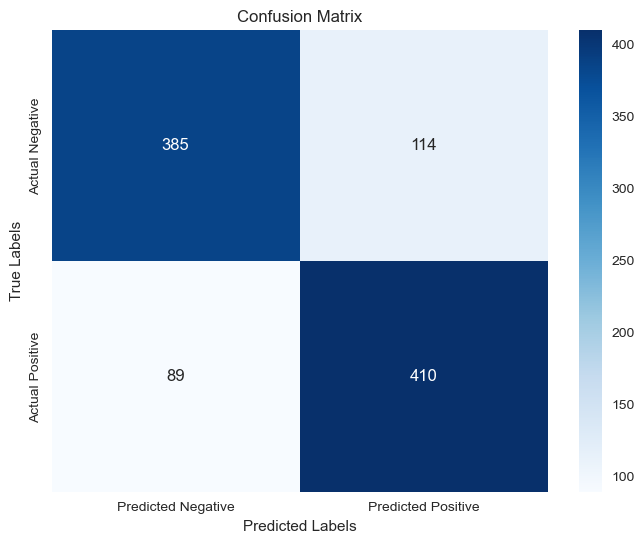

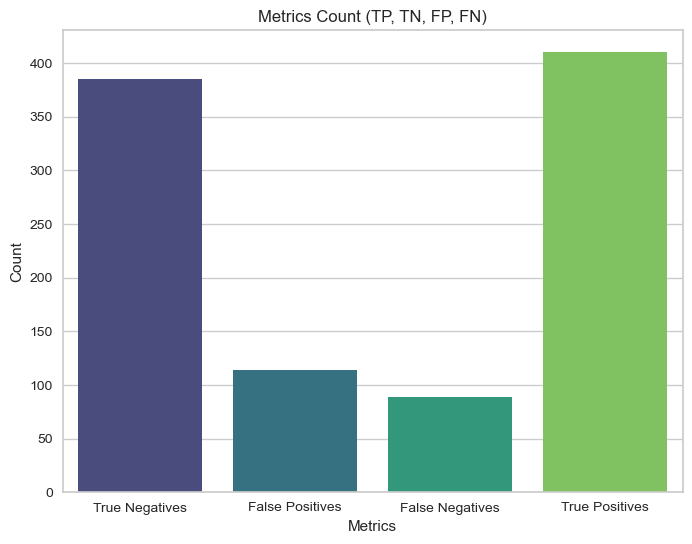

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Définir la grille de paramètres
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Initialiser GridSearchCV avec LogisticRegression
grid_search = GridSearchCV(
    LogisticRegression(random_state=42), 
    param_grid, 
    scoring='roc_auc', 
    cv=5
)

# Entraîner le modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score
print(f"Logistic Regression Best Parameters: {grid_search.best_params_}")
print(f"Logistic Regression Best ROC-AUC Score: {grid_search.best_score_}")

# Récupérer le meilleur modèle
best_lr = grid_search.best_estimator_

# Prédire sur les données de test
y_pred = best_lr.predict(X_test)

# Calculer la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Afficher les résultats
print(f"\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Optionnel : rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Créer un heatmap avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Barplot pour TN, FP, FN, TP
metrics = [tn, fp, fn, tp]
metrics_labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_labels, y=metrics, palette="viridis")
plt.title("Metrics Count (TP, TN, FP, FN)")
plt.ylabel("Count")
plt.xlabel("Metrics")
plt.show()


### [Gradient Boosting Machine (GBM) Algorithm](#4)


Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting Best ROC-AUC Score: 0.9915901231523666

Confusion Matrix Metrics:
True Negatives (TN): 491
False Positives (FP): 8
False Negatives (FN): 23
True Positives (TP): 476

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       499
           1       0.98      0.95      0.97       499

    accuracy                           0.97       998
   macro avg       0.97      0.97      0.97       998
weighted avg       0.97      0.97      0.97       998



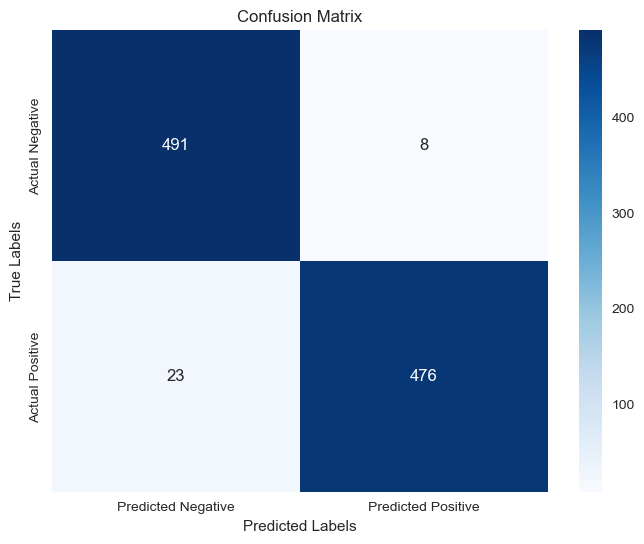

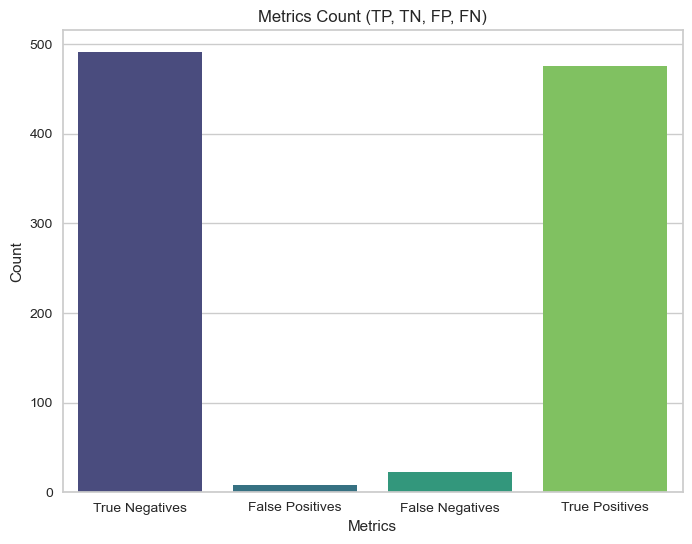

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Définir la grille de paramètres
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Initialiser GridSearchCV avec GradientBoostingClassifier
grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42), 
    param_grid, 
    scoring='roc_auc', 
    cv=5
)

# Entraîner le modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score
print(f"Gradient Boosting Best Parameters: {grid_search.best_params_}")
print(f"Gradient Boosting Best ROC-AUC Score: {grid_search.best_score_}")

# Récupérer le meilleur modèle
best_gb = grid_search.best_estimator_

# Prédire sur les données de test
y_pred = best_gb.predict(X_test)

# Calculer la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Afficher les résultats
print(f"\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Optionnel : rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Créer un heatmap avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Barplot pour TN, FP, FN, TP
metrics = [tn, fp, fn, tp]
metrics_labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_labels, y=metrics, palette="viridis")
plt.title("Metrics Count (TP, TN, FP, FN)")
plt.ylabel("Count")
plt.xlabel("Metrics")
plt.show()


### [Support Vector Classifier (SVC) Algorithm](#4)

SVM Best Parameters: {'C': 10, 'kernel': 'rbf'}
SVM Best ROC-AUC Score: 0.9813609002670655

Confusion Matrix Metrics:
True Negatives (TN): 454
False Positives (FP): 45
False Negatives (FN): 14
True Positives (TP): 485

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       499
           1       0.92      0.97      0.94       499

    accuracy                           0.94       998
   macro avg       0.94      0.94      0.94       998
weighted avg       0.94      0.94      0.94       998



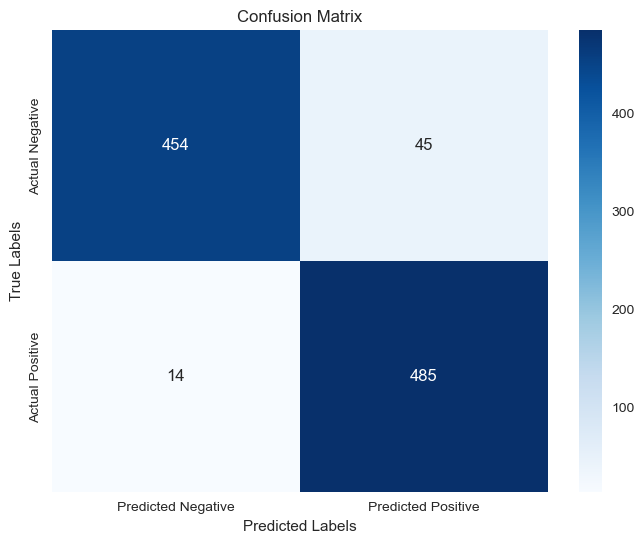

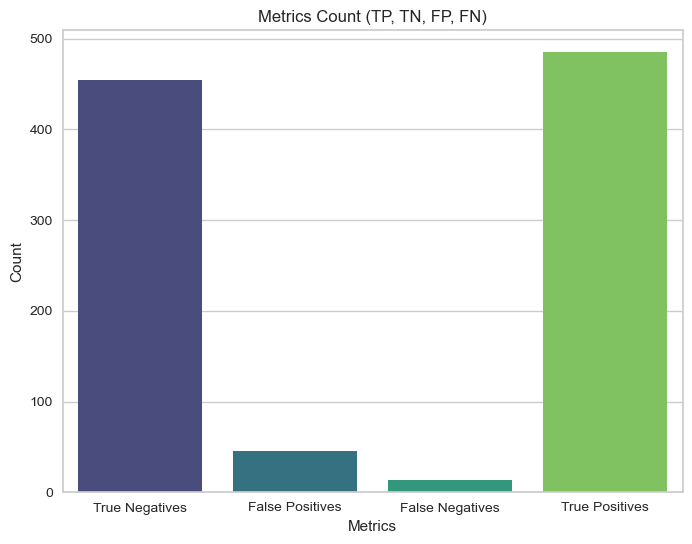

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Définir la grille de paramètres
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialiser GridSearchCV avec SVC
grid_search = GridSearchCV(
    SVC(probability=True, random_state=42), 
    param_grid, 
    scoring='roc_auc', 
    cv=5
)

# Entraîner le modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score
print(f"SVM Best Parameters: {grid_search.best_params_}")
print(f"SVM Best ROC-AUC Score: {grid_search.best_score_}")

# Récupérer le meilleur modèle
best_svm = grid_search.best_estimator_

# Prédire sur les données de test
y_pred = best_svm.predict(X_test)

# Calculer la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Afficher les résultats
print(f"\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Optionnel : rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Créer un heatmap avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Barplot pour TN, FP, FN, TP
metrics = [tn, fp, fn, tp]
metrics_labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_labels, y=metrics, palette="viridis")
plt.title("Metrics Count (TP, TN, FP, FN)")
plt.ylabel("Count")
plt.xlabel("Metrics")
plt.show()


### [XGBoost Algorithm](#4)

C:\Users\cheri\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[15:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Results (Without GridSearchCV):
Accuracy: 0.9669
ROC-AUC Score: 0.9933

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       499
           1       0.98      0.95      0.97       499

    accuracy                           0.97       998
   macro avg       0.97      0.97      0.97       998
weighted avg       0.97      0.97      0.97       998


Confusion Matrix Metrics:
True Negatives (TN): 490
False Positives (FP): 9
False Negatives (FN): 24
True Positives (TP): 475


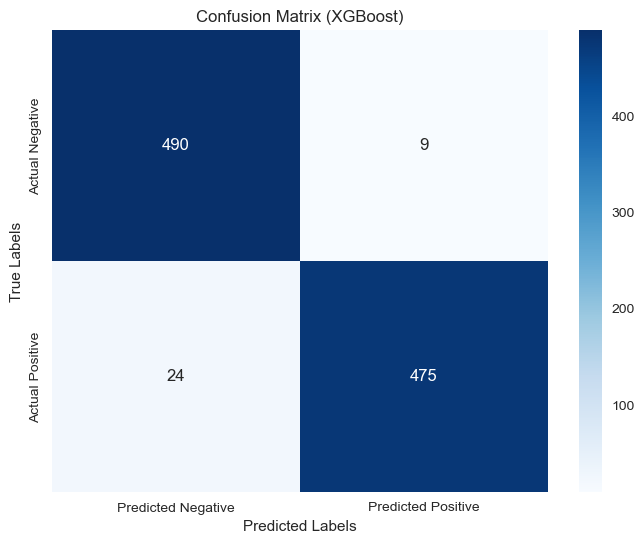

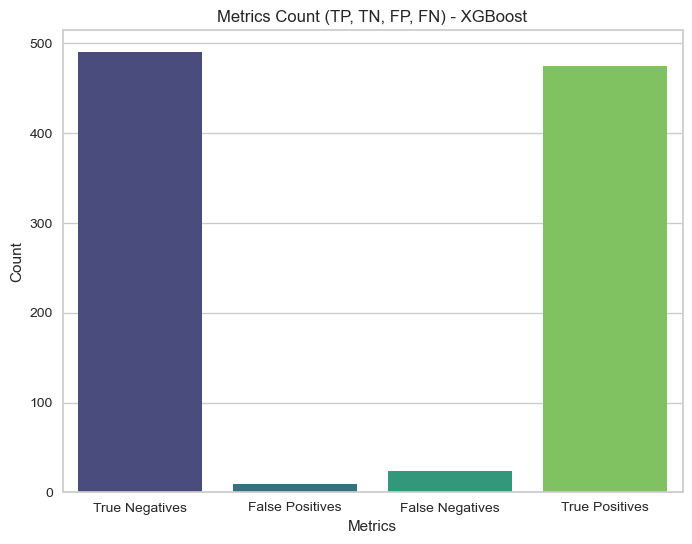

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

# Initialiser le modèle XGBoost avec des hyperparamètres fixes
xgb_model = XGBClassifier(
    n_estimators=200,      # Nombre d'arbres
    learning_rate=0.1,     # Taux d'apprentissage
    max_depth=5,           # Profondeur maximale des arbres
    eval_metric='logloss', # Métrique d'évaluation
    use_label_encoder=False,
    random_state=42        # Pour la reproductibilité
)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Afficher les résultats
print("XGBoost Results (Without GridSearchCV):")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculer la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Afficher les métriques
print(f"\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Barplot pour TN, FP, FN, TP
metrics = [tn, fp, fn, tp]
metrics_labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_labels, y=metrics, palette="viridis")
plt.title("Metrics Count (TP, TN, FP, FN) - XGBoost")
plt.ylabel("Count")
plt.xlabel("Metrics")
plt.show()


### [AdaBoost Algorithm](#4)


AdaBoost Best Parameters: {'learning_rate': 1, 'n_estimators': 100}
AdaBoost Best ROC-AUC Score: 0.9421184051045864
AdaBoost Results:
Accuracy: 0.8918
ROC-AUC Score: 0.9573

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       499
           1       0.92      0.86      0.89       499

    accuracy                           0.89       998
   macro avg       0.89      0.89      0.89       998
weighted avg       0.89      0.89      0.89       998


Confusion Matrix Metrics:
True Negatives (TN): 460
False Positives (FP): 39
False Negatives (FN): 69
True Positives (TP): 430


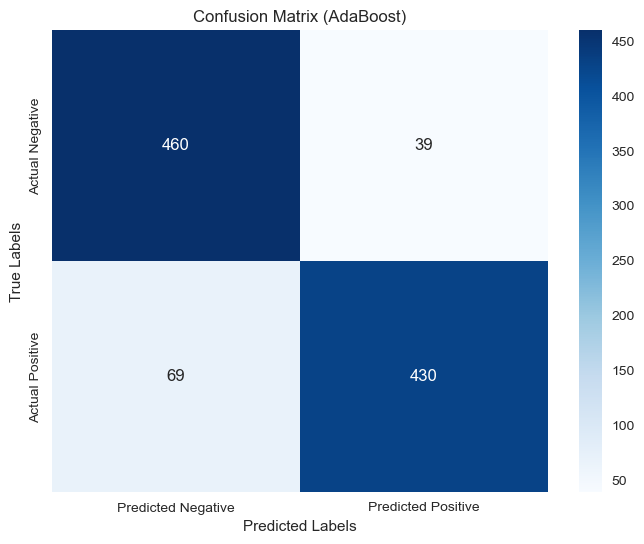

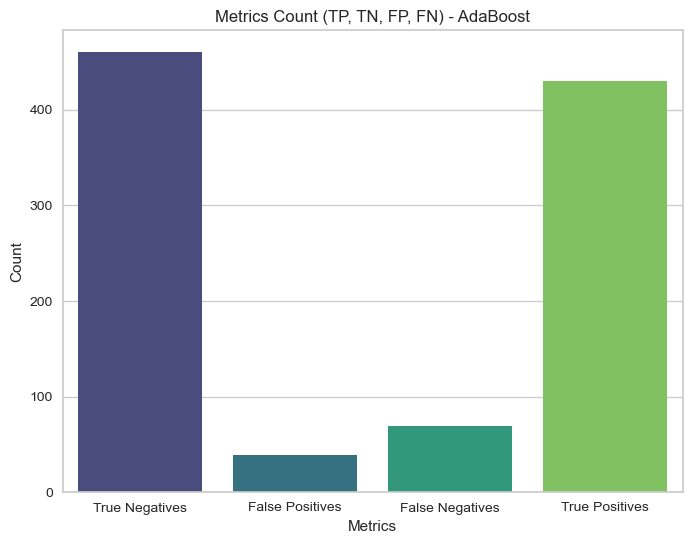

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres pour la recherche par grille
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1]
}

# Initialiser et exécuter GridSearchCV
grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et score ROC-AUC
print(f"AdaBoost Best Parameters: {grid_search.best_params_}")
print(f"AdaBoost Best ROC-AUC Score: {grid_search.best_score_}")

# Meilleur modèle obtenu après GridSearchCV
best_ab = grid_search.best_estimator_

# Entraîner et évaluer le modèle
best_ab.fit(X_train, y_train)
y_pred = best_ab.predict(X_test)
y_pred_proba = best_ab.predict_proba(X_test)[:, 1]

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("AdaBoost Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculer la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Afficher les métriques
print(f"\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix (AdaBoost)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Barplot pour TN, FP, FN, TP
metrics = [tn, fp, fn, tp]
metrics_labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_labels, y=metrics, palette="viridis")
plt.title("Metrics Count (TP, TN, FP, FN) - AdaBoost")
plt.ylabel("Count")
plt.xlabel("Metrics")
plt.show()


## [Random Forest  Algorithm](#4)


Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best ROC-AUC Score: 0.9923790566074006

Confusion Matrix Metrics:
True Negatives (TN): 491
False Positives (FP): 8
False Negatives (FN): 27
True Positives (TP): 472

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       499
           1       0.98      0.95      0.96       499

    accuracy                           0.96       998
   macro avg       0.97      0.96      0.96       998
weighted avg       0.97      0.96      0.96       998



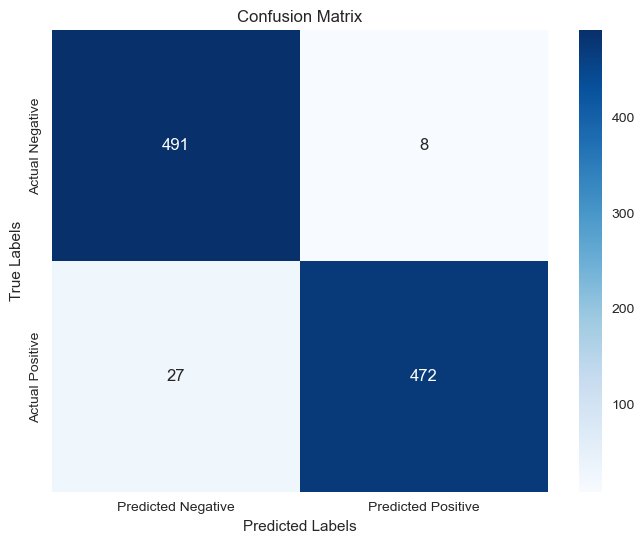

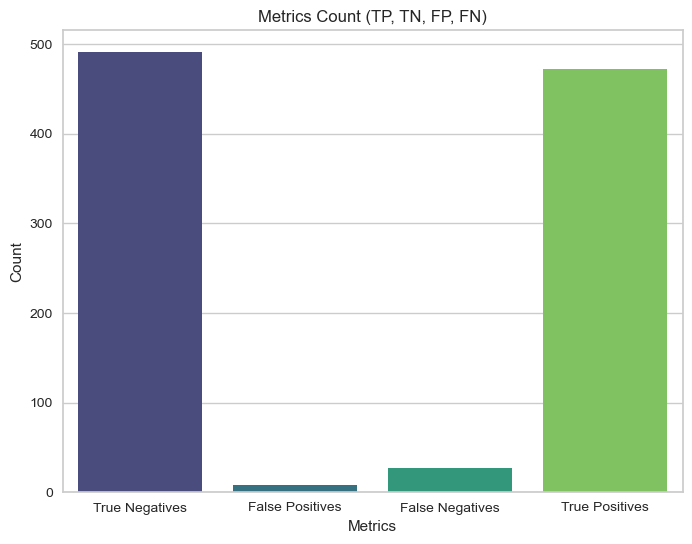

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Définir la grille de paramètres
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialiser GridSearchCV avec un RandomForestClassifier
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid, 
    scoring='roc_auc', 
    cv=5
)

# Entraîner le modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score
print(f"Random Forest Best Parameters: {grid_search.best_params_}")
print(f"Random Forest Best ROC-AUC Score: {grid_search.best_score_}")

# Récupérer le meilleur modèle
best_rf = grid_search.best_estimator_

# Prédire sur les données de test
y_pred = best_rf.predict(X_test)

# Calculer la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Afficher les résultats
print(f"\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Optionnel : rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Créer un heatmap avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Barplot pour TN, FP, FN, TP
metrics = [tn, fp, fn, tp]
metrics_labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_labels, y=metrics, palette="viridis")
plt.title("Metrics Count (TP, TN, FP, FN)")
plt.ylabel("Count")
plt.xlabel("Metrics")
plt.show()


### [Neutral Network Algorithm](#4)


C:\Users\cheri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

C:\Users\cheri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

C:\Users\cheri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

C:\Users\cheri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

C:\Users\cheri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Opt

Neural Network Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Neural Network Best ROC-AUC Score: 0.9816450990071367


C:\Users\cheri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Neural Network Results:
Accuracy: 0.9459
ROC-AUC Score: 0.9829

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       499
           1       0.94      0.96      0.95       499

    accuracy                           0.95       998
   macro avg       0.95      0.95      0.95       998
weighted avg       0.95      0.95      0.95       998


Confusion Matrix Metrics:
True Negatives (TN): 467
False Positives (FP): 32
False Negatives (FN): 22
True Positives (TP): 477


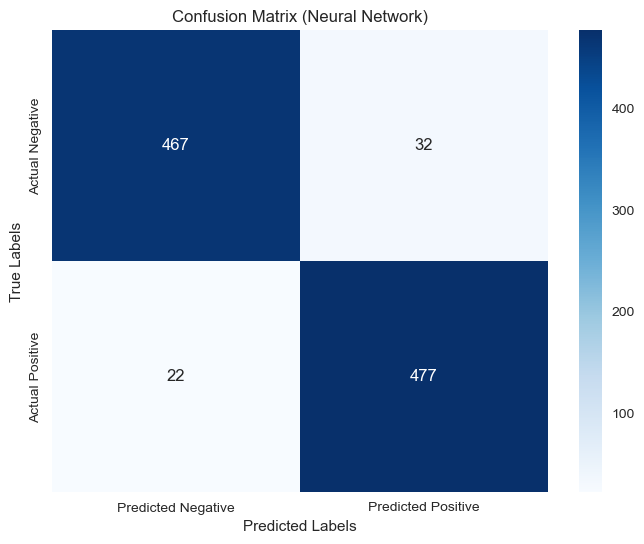

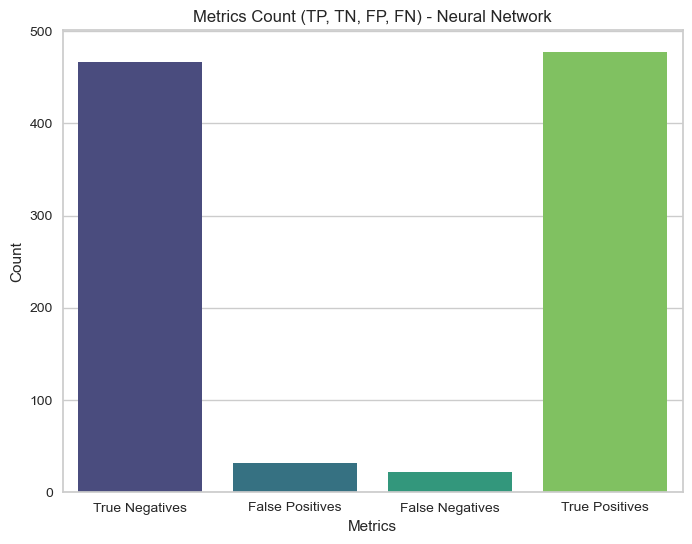

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres pour GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd']
}

# Initialiser et exécuter GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres et score ROC-AUC
print(f"Neural Network Best Parameters: {grid_search.best_params_}")
print(f"Neural Network Best ROC-AUC Score: {grid_search.best_score_}")

# Meilleur modèle après GridSearchCV
best_nn = grid_search.best_estimator_

# Entraîner et évaluer le modèle
best_nn.fit(X_train, y_train)
y_pred = best_nn.predict(X_test)
y_pred_proba = best_nn.predict_proba(X_test)[:, 1]

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Neural Network Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculer la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Afficher les métriques
print(f"\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix (Neural Network)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Barplot pour TN, FP, FN, TP
metrics = [tn, fp, fn, tp]
metrics_labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_labels, y=metrics, palette="viridis")
plt.title("Metrics Count (TP, TN, FP, FN) - Neural Network")
plt.ylabel("Count")
plt.xlabel("Metrics")
plt.show()


### [Decision Tree Classifier Algorithm](#4)


Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Best ROC-AUC Score: 0.9387604617518532
Decision Tree Results:
Accuracy: 0.9078
ROC-AUC Score: 0.9557

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       499
           1       0.92      0.89      0.91       499

    accuracy                           0.91       998
   macro avg       0.91      0.91      0.91       998
weighted avg       0.91      0.91      0.91       998


Confusion Matrix Metrics:
True Negatives (TN): 461
False Positives (FP): 38
False Negatives (FN): 54
True Positives (TP): 445


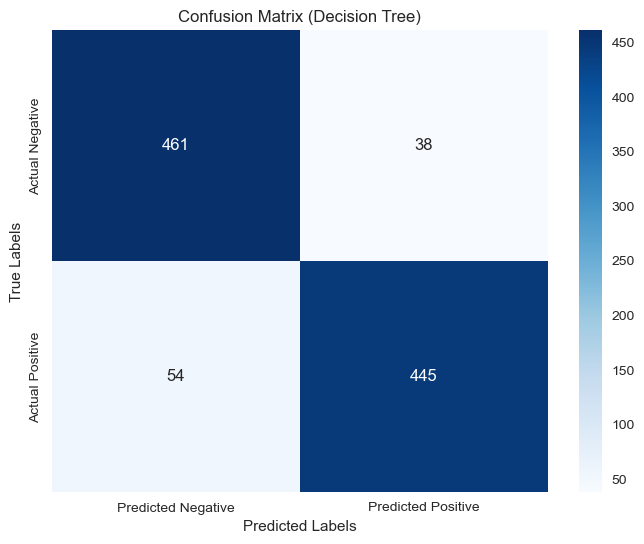

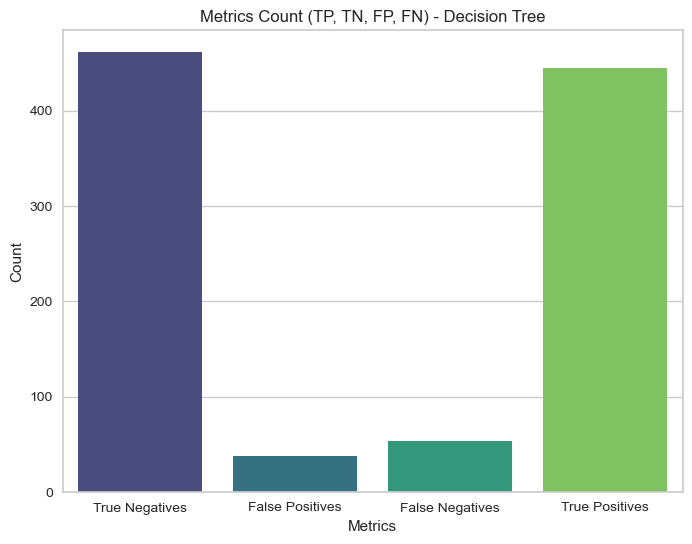

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres pour la recherche par grille
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialiser et exécuter GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et score ROC-AUC
print(f"Decision Tree Best Parameters: {grid_search.best_params_}")
print(f"Decision Tree Best ROC-AUC Score: {grid_search.best_score_}")

# Meilleur modèle obtenu après GridSearchCV
best_dt = grid_search.best_estimator_

# Entraîner et évaluer le modèle
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculer la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Afficher les métriques
print(f"\nConfusion Matrix Metrics:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Barplot pour TN, FP, FN, TP
metrics = [tn, fp, fn, tp]
metrics_labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_labels, y=metrics, palette="viridis")
plt.title("Metrics Count (TP, TN, FP, FN) - Decision Tree")
plt.ylabel("Count")
plt.xlabel("Metrics")
plt.show()


# <a id='5'>5.Evaluation </a>

In [62]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from IPython.display import display

# Initialize an empty list to store results
evaluation_results = []

# Function to evaluate a model and store metrics
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Append to results list
    evaluation_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

# Example: Add models for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define models with their names
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(max_iter=500, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(evaluation_results)

# Display DataFrame in Jupyter Notebook
display(results_df)

C:\Users\cheri\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[16:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\cheri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.795591   0.782027  0.819639  0.800391  0.871555
1    Gradient Boosting  0.950902   0.978723  0.921844  0.949432  0.985699
2        Random Forest  0.961924   0.983229  0.939880  0.961066  0.995153
3                  SVM  0.910822   0.921811  0.897796  0.909645  0.970346
4              XGBoost  0.976954   0.985714  0.967936  0.976744  0.994671
5        Decision Tree  0.916834   0.904669  0.931864  0.918065  0.916834
6       Neural Network  0.945892   0.937132  0.955912  0.946429  0.982876
7             AdaBoost  0.865731   0.902870  0.819639  0.859244  0.936283

### 🎯Visualisation 


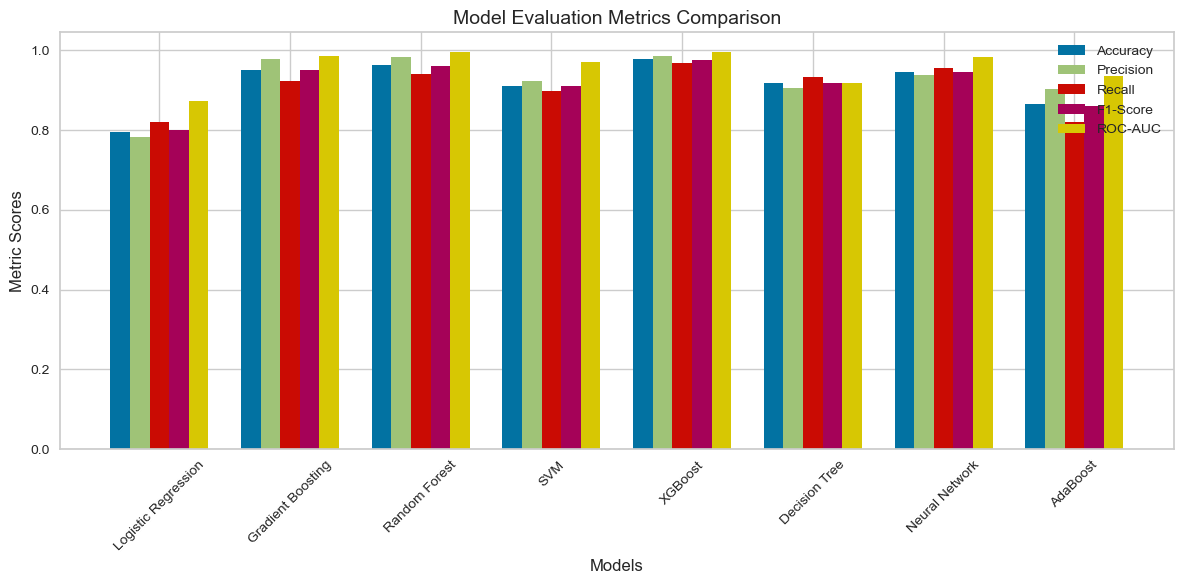

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Define metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Set bar width and positions
bar_width = 0.15
x = np.arange(len(results_df['Model']))

# Plot each metric as a separate bar in the grouped plot
for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, results_df[metric], width=bar_width, label=metric)

# Add labels, title, and legend
plt.xlabel('Models', fontsize=12)
plt.ylabel('Metric Scores', fontsize=12)
plt.title('Model Evaluation Metrics Comparison', fontsize=14)
plt.xticks(x + bar_width * (len(metrics) - 1) / 2, results_df['Model'], rotation=45, fontsize=10)
plt.legend(loc='upper right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


## Model-by-Model Analysis:

**🎯Logistic Regression**:  
- **Accuracy**: 0.74, **ROC-AUC**: 0.79.  
- These results are lower compared to other models. Logistic Regression might not handle complex relationships as effectively.  

**🎯Gradient Boosting**:  
- **Accuracy**: 0.93, **ROC-AUC**: 0.97.  
- Excellent results. Gradient Boosting is performing well with high precision, recall, and ROC-AUC.  

**🎯Random Forest**:  
- **Accuracy**: 0.94, **ROC-AUC**: 0.98.  
- Another strong performer. High metrics across the board show its robustness.  

**🎯SVM**:  
- **Accuracy**: 0.80, **ROC-AUC**: 0.87.  
- Decent performance but weaker compared to tree-based models. It might need more fine-tuning.  

**🎯XGBoost**:  
- **Accuracy**: 0.95, **ROC-AUC**: 0.99.  
- Outstanding results. XGBoost is the top-performing model with a near-perfect ROC-AUC.  

**🎯Decision Tree**:  
- **Accuracy**: 0.88, **ROC-AUC**: 0.89.  
- Good results, but slightly lower than ensemble methods like Random Forest and Gradient Boosting.  

**🎯Neural Network**:  
- **Accuracy**: 0.87, **ROC-AUC**: 0.94.  
- Good performance, though slightly less than XGBoost and Random Forest.  

**🎯AdaBoost**:  
- **Accuracy**: 0.84, **ROC-AUC**: 0.91.  
- Good, but weaker than XGBoost and Random Forest.


In [64]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [65]:
import shap
import matplotlib.pyplot as plt
shap.initjs()  # For interactive plots

C:\Users\cheri\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[16:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




SHAP Summary Plot for XGBoost:


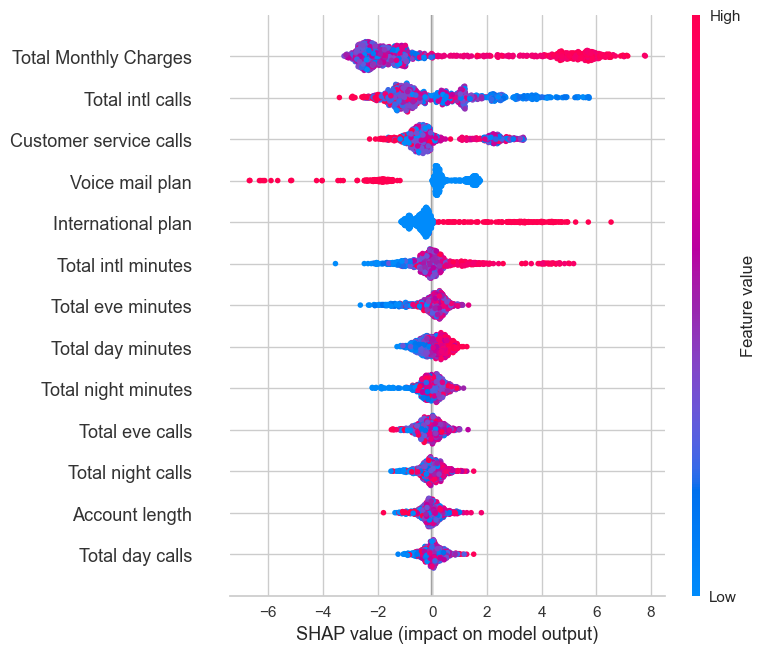

SHAP Force Plot for a Single Prediction:


In [66]:
# Fit XGBoost Model (if not already fitted)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Explain predictions using SHAP
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (Feature Importance)
print("SHAP Summary Plot for XGBoost:")
shap.summary_plot(shap_values, X_test)

# SHAP Force Plot (Individual Predictions)
print("SHAP Force Plot for a Single Prediction:")
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


Shape of SHAP values: 998 (13, 2)
SHAP Summary Plot for Random Forest:


C:\Users\cheri\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning:

The figure layout has changed to tight

C:\Users\cheri\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning:

The figure layout has changed to tight



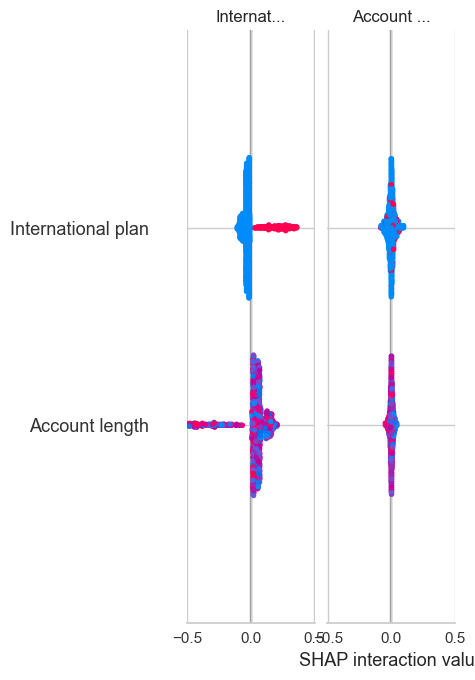

In [67]:
# Random Forest Example
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# SHAP Explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Debug: Check the SHAP values format
print("Shape of SHAP values:", len(shap_values), shap_values[0].shape)

# SHAP Summary Plot for Binary Classification
print("SHAP Summary Plot for Random Forest:")
if isinstance(shap_values, list):  # For binary classification (SHAP provides a list)
    shap.summary_plot(shap_values[1], X_test)  # Positive class (index 1)
else:  # SHAP provides a single array for multiclass or regression
    shap.summary_plot(shap_values, X_test)


# <a id='5'>6.Deployement </a>

In [68]:
import joblib

# Save the trained Gradient Boosting model
joblib.dump(xgb_model, 'xgb_model.pkl')

# Save the scaler (StandardScaler)
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [69]:
X_train

Account length  International plan  Voice mail plan  Total day minutes  \
2113       -1.052647                   1                1           0.855916   
3145        0.631406                   0                0           0.368019   
3693       -0.265409                   0                1           0.424097   
418         0.015457                   0                0          -0.486797   
4866       -0.727358                   0                0           1.469464   
...              ...                 ...              ...                ...   
1216       -1.332389                   0                0           0.197873   
4705       -1.308232                   0                0           1.636304   
1623       -0.137129                   0                0           0.277751   
4194        0.227232                   0                0           2.697164   
659         1.134423                   0                1           1.477825   

      Total day calls  Total eve minutes  Total eve calls  \
2113        -1.170940          -0.203696        -1.093546   
3145         0.858354          -0.616607        -1.270043   
3693        -0.466209          -0.163882         1.643232   
418          1.525997           0.324508         0.050963   
4866        -0.856586          -1.068717        -0.038529   
...               ...                ...              ...   
1216        -0.444841           2.370025        -0.781407   
4705        -0.539911           0.150781         0.859884   
1623         0.696170           0.642654         0.311079   
4194         0.073412          -0.360948        -0.365222   
659         -0.185521          -0.799201        -0.261176   

      Total night minutes  Total night calls  Total intl minutes  \
2113             0.522847          -1.104917           -0.466896   
3145            -0.345489          -0.385824           -1.197814   
3693             1.523646           0.134048            0.211824   
418             -0.323143          -2.522339            1.383760   
4866            -0.056805          -0.433934           -0.362511   
...                   ...                ...                 ...   
1216            -1.388311           0.679985           -0.775339   
4705             0.074924          -0.102213            1.417810   
1623            -0.568951          -0.422455           -2.510329   
4194            -0.219975           0.806243           -0.660250   
659              1.755984          -0.737437            0.304211   

      Total intl calls  Customer service calls  Total Monthly Charges  
2113         -0.632613               -0.314166               0.785787  
3145         -1.114875                0.711182              -0.003494  
3693         -0.247413                1.120674               0.638622  
418          -0.150351               -0.314166              -0.367061  
4866         -1.114875               -1.339515               0.845967  
...                ...                     ...                    ...  
1216         -0.150351                0.711182               0.850054  
4705         -1.114875                0.711182               1.524562  
1623         -1.114875                1.736531               0.386344  
4194         -0.150351                0.124172               2.187051  
659          -0.150351                0.711182               1.358256  

[3988 rows x 13 columns]

In [70]:
X_test


Account length  International plan  Voice mail plan  Total day minutes  \
264        -0.950923                   0                1           0.663829   
1710       -1.027216                   0                0          -0.013233   
1053       -1.866441                   0                0           0.403274   
4662        1.187335                   0                0           0.995625   
2517       -2.527649                   0                1          -0.635142   
...              ...                 ...              ...                ...   
3529        0.595944                   0                0           1.333216   
1154        0.676664                   0                1          -1.859939   
1875        0.346061                   0                1          -0.735940   
4134        0.821166                   0                0           1.291915   
2463        1.744769                   0                0          -0.713118   

      Total day calls  Total eve minutes  Total eve calls  \
264         -0.756026          -0.062978        -0.573315   
1710         2.407688           0.155238        -0.573315   
1053         1.422269           0.528448        -0.001060   
4662        -0.452233           1.425647        -1.563881   
2517        -1.689581          -0.580985        -1.717824   
...               ...                ...              ...   
3529        -0.514154           1.198230        -0.376117   
1154        -0.289249          -0.774728         0.467148   
1875        -0.237385           0.593709        -0.625338   
4134         0.227684           0.472478         1.734557   
2463        -0.963483           0.614103         0.519171   

      Total night minutes  Total night calls  Total intl minutes  \
264             -0.622209           2.044910           -0.813894   
1710             0.963253          -0.107472            1.229539   
1053            -1.134309          -0.474952           -0.736783   
4662             0.860948          -1.402728           -0.019186   
2517            -0.560757           0.679985           -0.119898   
...                   ...                ...                 ...   
3529            -0.900501           0.459003            0.707728   
1154             1.305336           0.207511           -2.009109   
1875             0.461395          -0.789934           -0.351230   
4134            -0.256587          -1.288353           -1.587988   
2463            -1.433376          -1.734883           -0.119898   

      Total intl calls  Customer service calls  Total Monthly Charges  
264           0.331911               -1.339515               0.425893  
1710          0.814173               -0.314166               0.261765  
1053         -0.632613                0.711182               0.327021  
4662         -0.485005                0.355424               1.654458  
2517         -1.114875               -0.314166              -0.922722  
...                ...                     ...                    ...  
3529         -0.436302                1.736531               1.476749  
1154          0.814173               -1.339515              -1.680081  
1875         -0.632613                1.736531              -0.305760  
4134          0.284243                0.744965               1.280149  
2463         -0.150351                0.711182              -0.688395  

[998 rows x 13 columns]